**Task 1: Load the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('telco_churn.csv')
print(df.head())
print(df.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

**Task 2: Data Cleaning**

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df.drop_duplicates(inplace=True)

if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

print(df.isnull().sum())
print(df.shape)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
(7043, 20)


/tmp/ipython-input-3894705925.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


**Task 3: Visualisation**

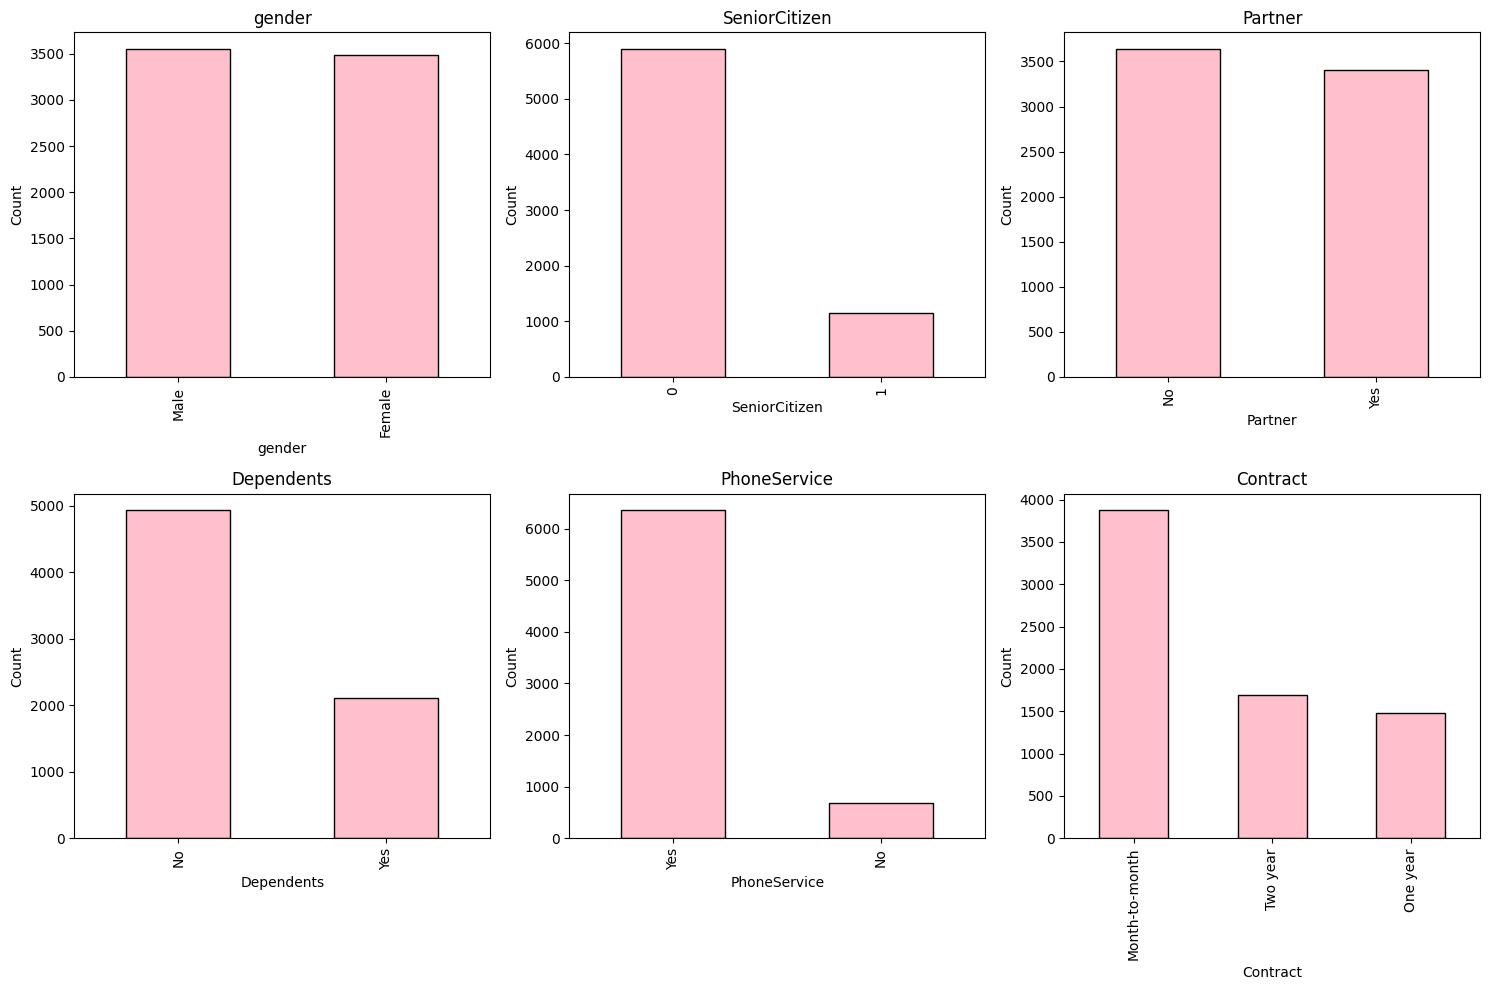

In [ ]:
features_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'Contract']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(features_to_plot):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='pink', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Task 4: Scaling and Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df.drop(columns=['Churn'])
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])
print(X.shape)

[[-1.00955867 -0.43991649  1.03453023 -0.65401193 -1.27744458 -3.05401039
   0.06272275 -1.18323364 -0.91883775  1.24254983 -1.02791014 -0.92526212
  -1.11349541 -1.12140513 -0.8282069   0.8297975   0.39855772 -1.16032292
  -0.99424194]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193  0.06632742  0.32743831
  -0.9915883  -1.18323364  1.40732123 -1.02991925  1.24511061 -0.92526212
  -1.11349541 -1.12140513  0.37127103 -1.20511329  1.33486261 -0.25962894
  -0.17324413]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193 -1.23672422  0.32743831
  -0.9915883  -1.18323364  1.40732123  1.24254983 -1.02791014 -0.92526212
  -1.11349541 -1.12140513 -0.8282069   0.8297975   1.33486261 -0.36266036
  -0.95967407]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193  0.51425142 -3.05401039
   0.06272275 -1.18323364  1.40732123 -1.02991925  1.24511061  1.39629866
  -1.11349541 -1.12140513  0.37127103 -1.20511329 -1.47405205 -0.74653546
  -0.19476626]
 [-1.00955867 -0.43991649 -0.96662231 -0.65401193 -1

**Task 5: Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=3327)

print(X_train.shape)
print(X_test.shape)

(5634, 19)
(1409, 19)


**Task 6: Apply SVM Classifier**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=3327)
svm_model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


**Task 7: Confusion Matrix**

[[937 105]
 [163 204]]


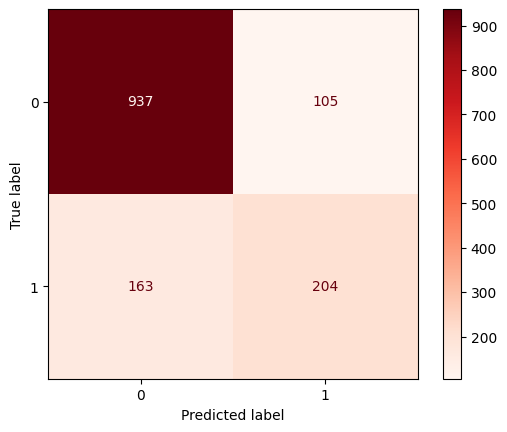

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Reds')
plt.show()

**Task 8: Calculate Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = svm_model.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)

print(train_acc)
print(test_acc)

0.7973020944266951
0.8097941802696949


**Task 9: Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm_model, X_scaled, y, cv=10)

print(cv_scores)
print(cv_scores.mean())

[0.79574468 0.80567376 0.8        0.82670455 0.78125    0.77272727
 0.79971591 0.79261364 0.79119318 0.79119318]
0.7956816166989039
